In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mutual_info_score, roc_auc_score,roc_curve,f1_score,precision_recall_curve
import time
import math
import plotly.graph_objects as go
import plotly.subplots as sp
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
import time
start_time = time.time()
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

Execution time: 5.602836608886719e-05 seconds


# Data Exploration (EDA - Exploratory Data Analysis)

In [3]:
credit_record=pd.read_csv("credit_record.csv")
application_record=pd.read_csv("application_record.csv")

In [4]:
credit_record.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [5]:
application_record.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438555 non-null  object 
 3   FLAG_OWN_REALTY      438556 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438555 non-null  float64
 6   NAME_INCOME_TYPE     438551 non-null  object 
 7   NAME_EDUCATION_TYPE  438550 non-null  object 
 8   NAME_FAMILY_STATUS   438551 non-null  object 
 9   NAME_HOUSING_TYPE    438550 non-null  object 
 10  DAYS_BIRTH           438549 non-null  float64
 11  DAYS_EMPLOYED        438554 non-null  float64
 12  FLAG_MOBIL           438556 non-null  float64
 13  FLAG_WORK_PHONE      438556 non-null  float64
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [6]:
credit_record.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [7]:
application_record.isnull().sum()


ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             1
CNT_CHILDREN                0
AMT_INCOME_TOTAL            2
NAME_INCOME_TYPE            6
NAME_EDUCATION_TYPE         7
NAME_FAMILY_STATUS          6
NAME_HOUSING_TYPE           7
DAYS_BIRTH                  8
DAYS_EMPLOYED               3
FLAG_MOBIL                  1
FLAG_WORK_PHONE             1
FLAG_PHONE                  0
FLAG_EMAIL                  1
OCCUPATION_TYPE        134207
CNT_FAM_MEMBERS             1
dtype: int64

In [8]:
#Categorical data
binary = [col for col in application_record.columns if set(application_record[col].unique()) <= {0, 1}]
category = [col for col in application_record.select_dtypes(include = ['object','category']).columns]
category += binary

<Axes: >

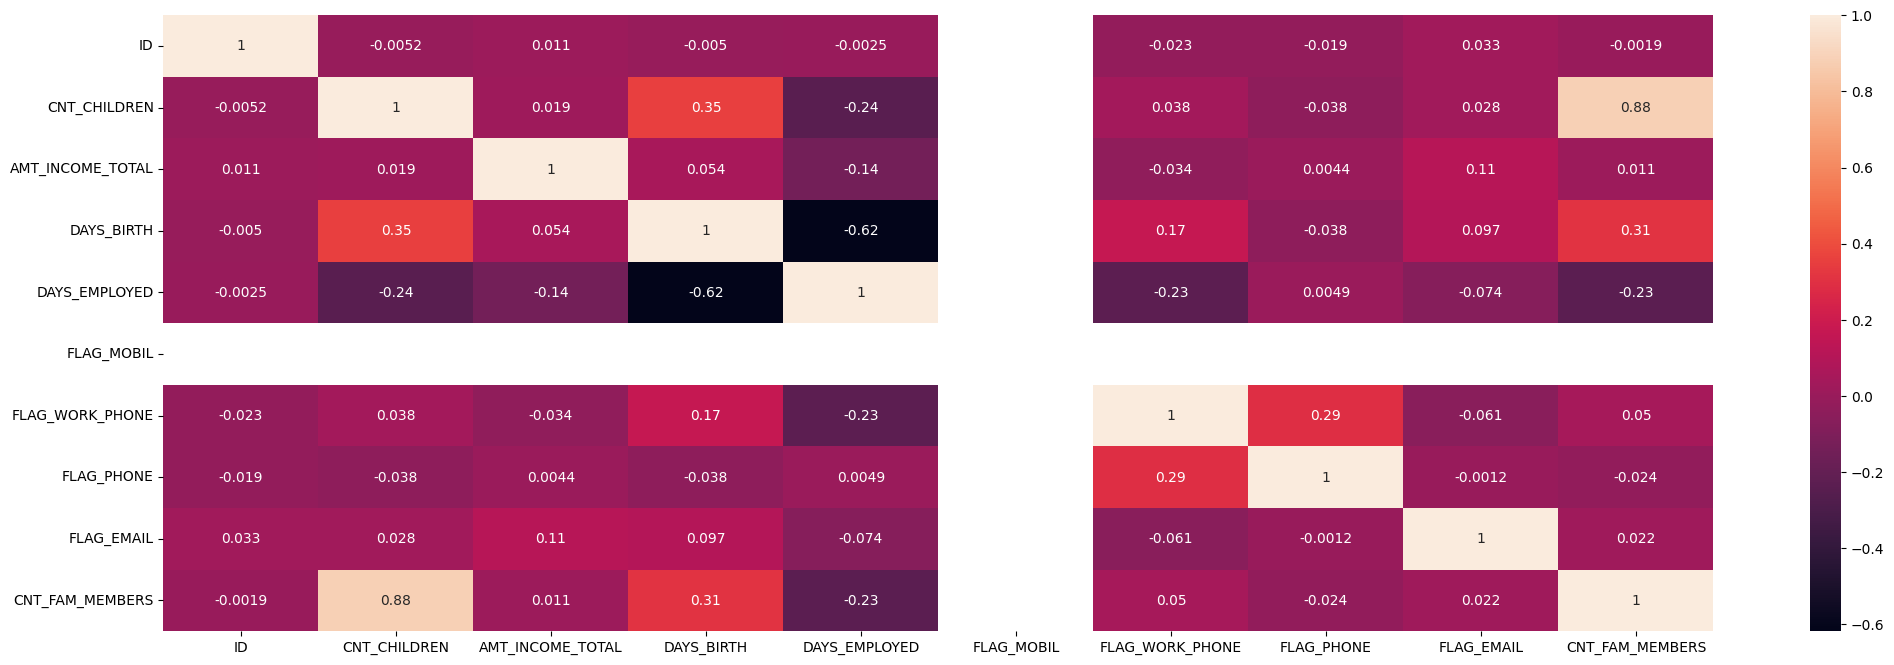

In [9]:
# correlation matrix
plt.figure(figsize=(25,8))
sns.heatmap(application_record.select_dtypes(exclude='object').corr(),annot=True)

In [10]:
def countplot_applicants(features):
    for feature in features:
        plt.figure(figsize=(9, 9))
        ax=sns.countplot(y=application_record[feature], hue='CODE_GENDER' , data=application_record)
        plt.legend(loc='best')
        total = len(application_record[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10700\713224849.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


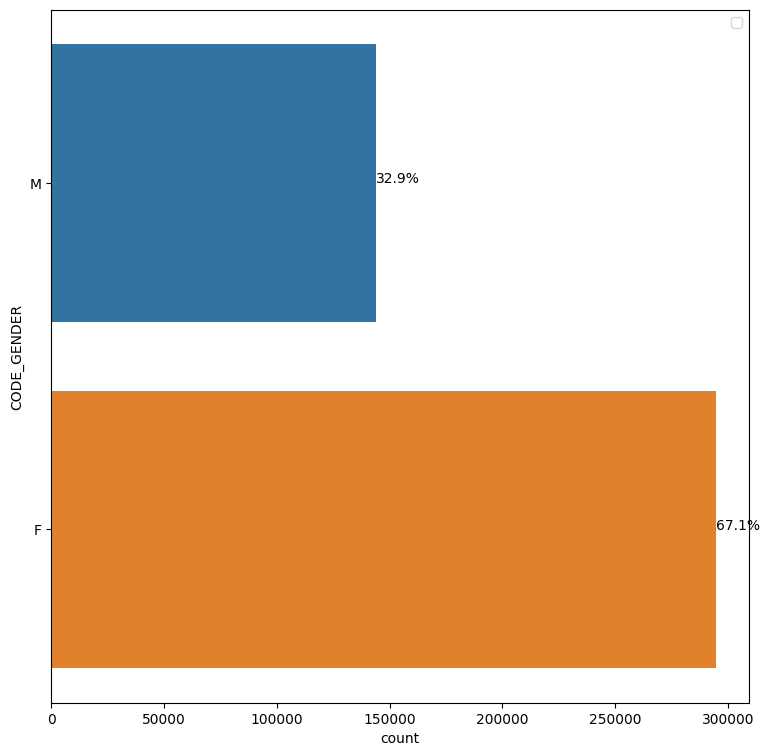

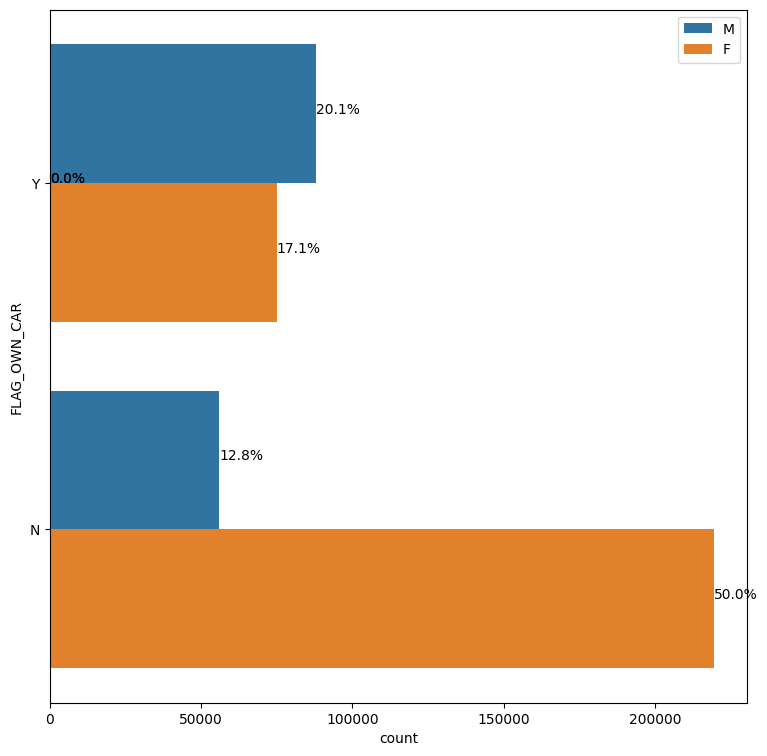

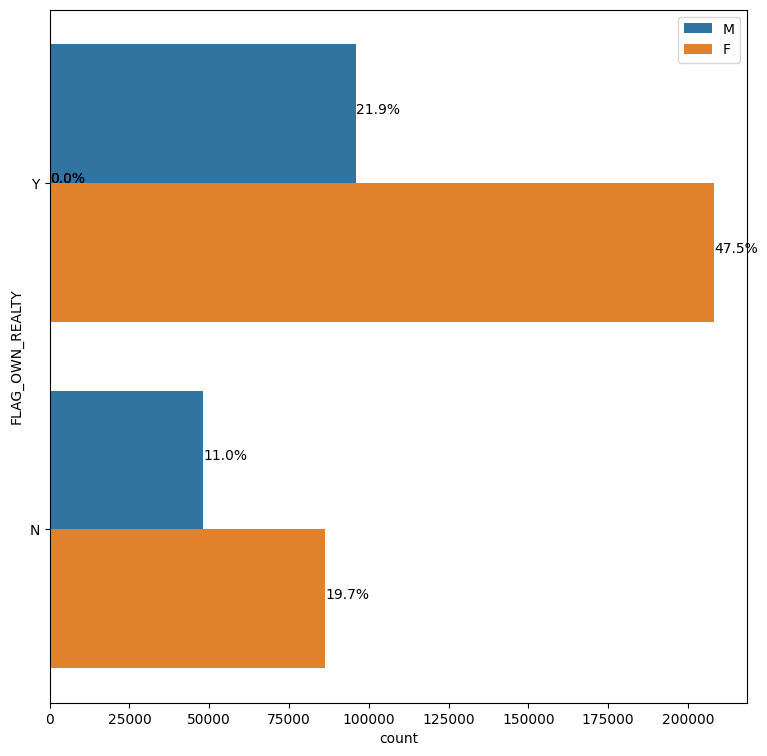

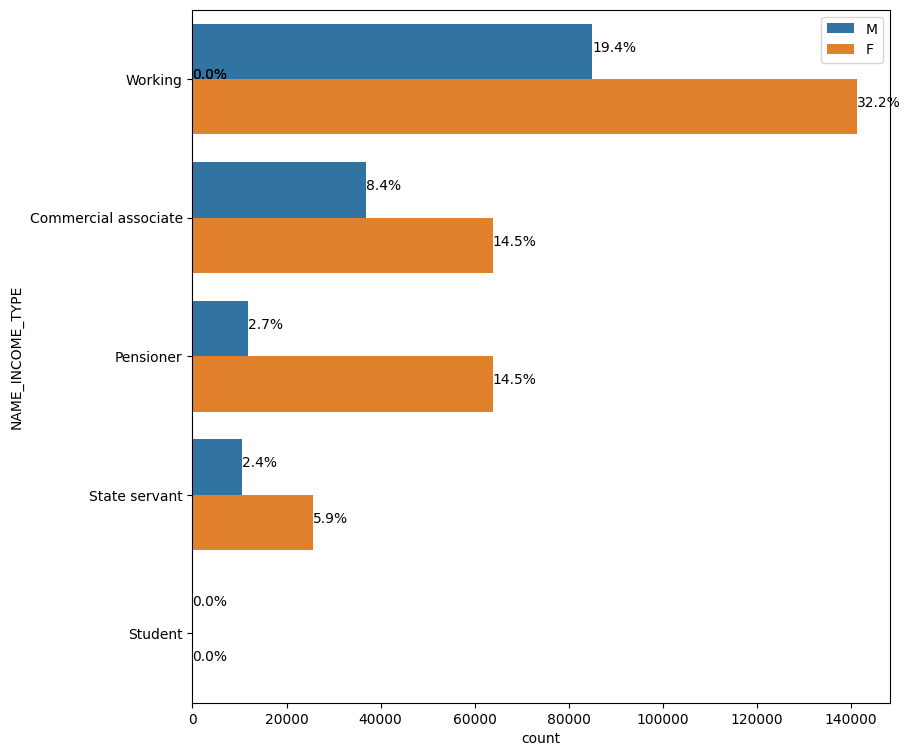

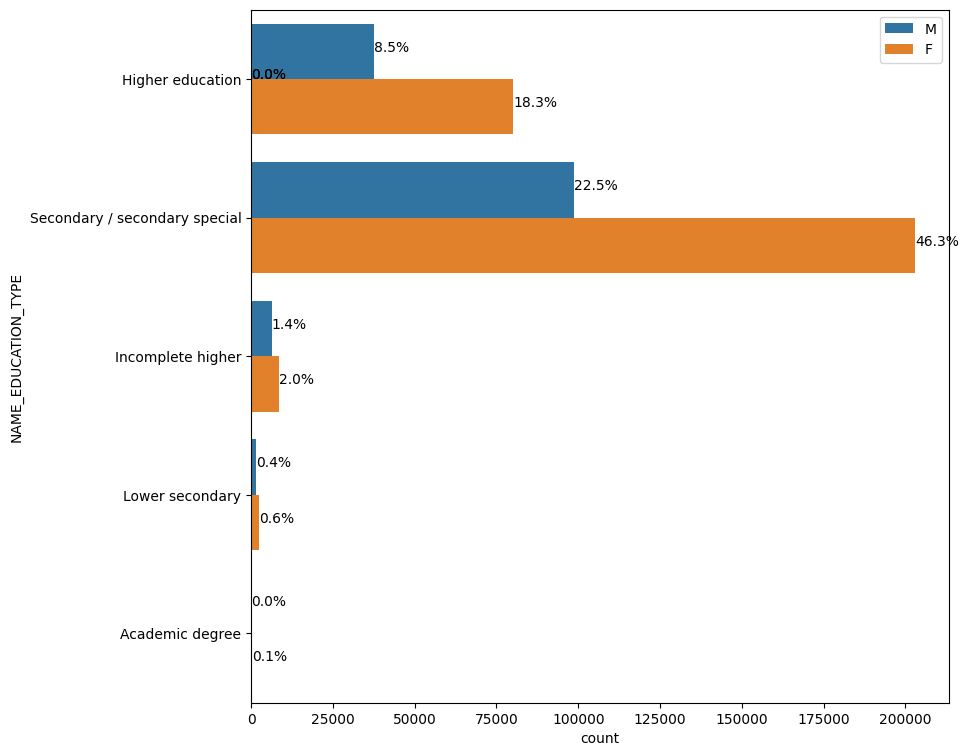

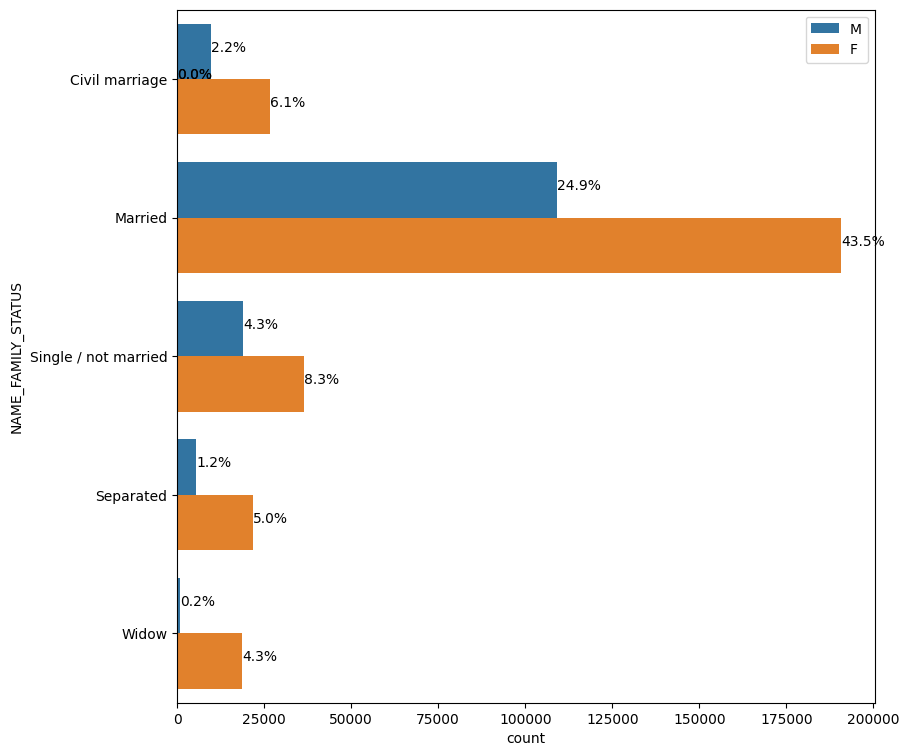

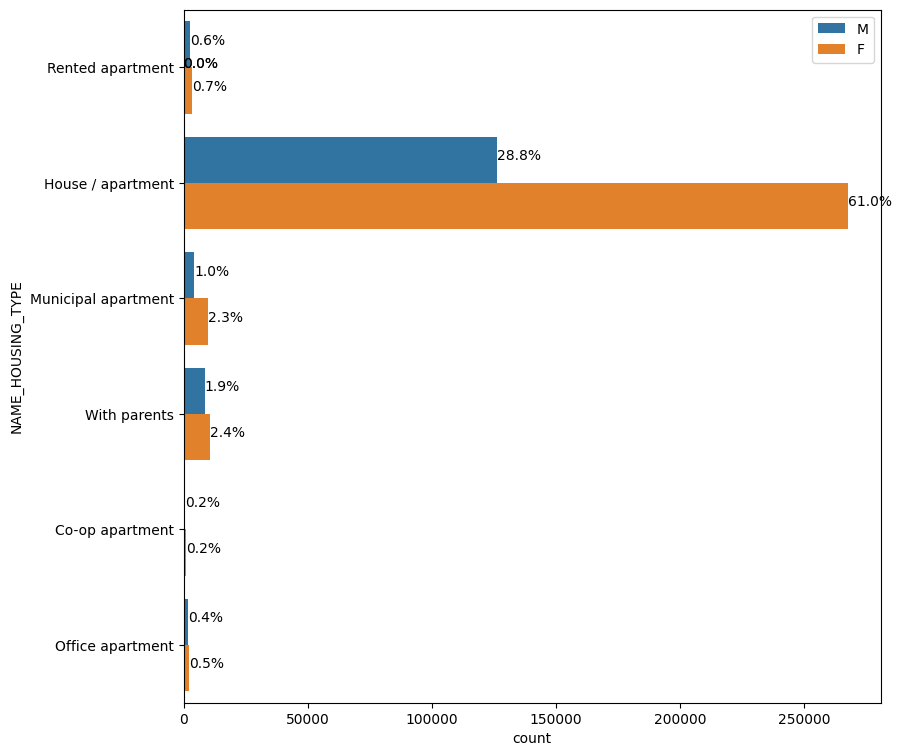

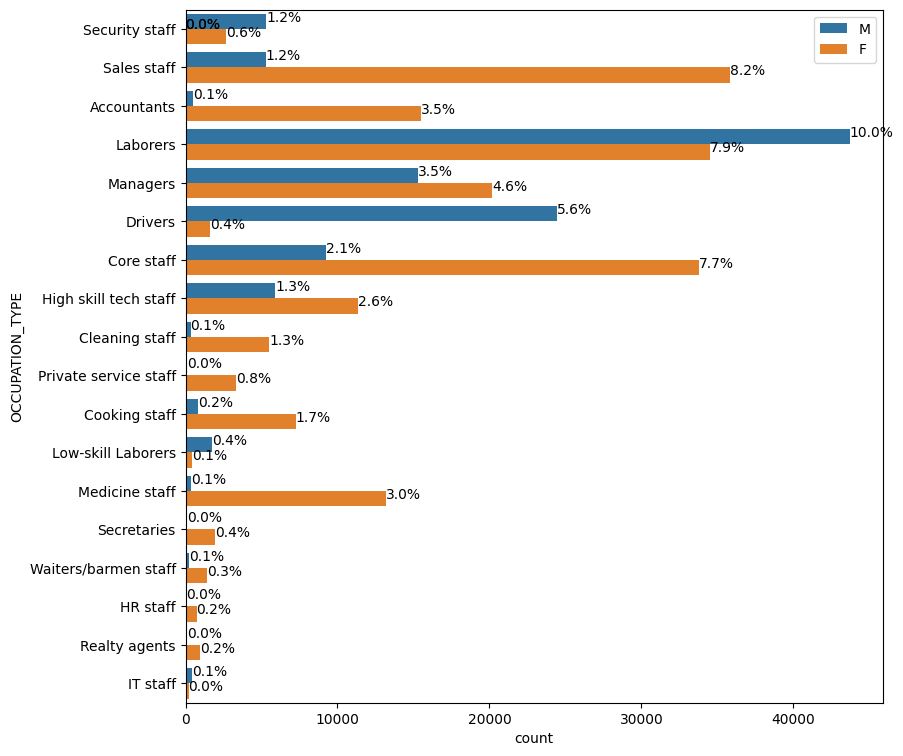

In [11]:
countplot_applicants(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE'])

In [11]:
def countplot_credit(features):
    for feature in features:
        plt.figure(figsize=(9, 9))
        ax=sns.countplot(y=credit_record[feature], data=credit_record)
        total = len(credit_record[feature])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

In [12]:
Numerical=application_record.select_dtypes(exclude='object').columns.tolist()
Numerical

['ID',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS']

C:\Users\user\AppData\Local\Temp\ipykernel_8560\3393342194.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g1=sns.countplot(x=application_record.FLAG_PHONE,linewidth=1, ax=axes[0],palette="Set2")
C:\Users\user\AppData\Local\Temp\ipykernel_8560\3393342194.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g2=sns.countplot(x=application_record.FLAG_EMAIL,linewidth=1.2, ax=axes[1],palette="Set2")
C:\Users\user\AppData\Local\Temp\ipykernel_8560\3393342194.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g3=sns.countplot(x=application_record.FLAG_WORK_PHONE,linewidth=1.2, 

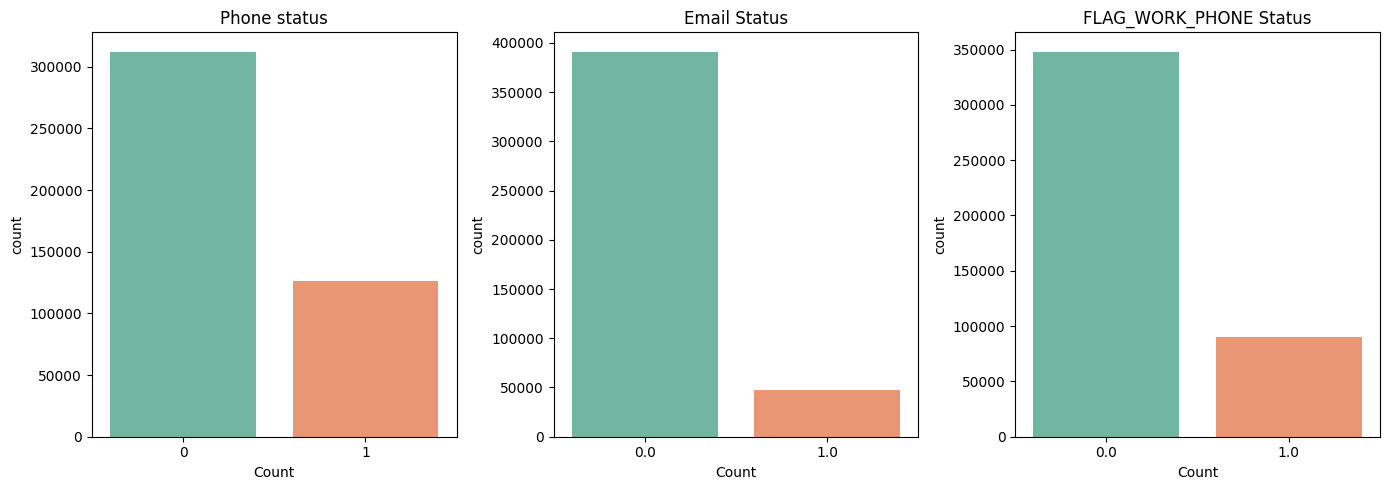

In [13]:
fig, axes = plt.subplots(1,3)

g1=sns.countplot(x=application_record.FLAG_PHONE,linewidth=1, ax=axes[0],palette="Set2")
g1.set_title("Phone status")
g1.set_xlabel("Count")

g2=sns.countplot(x=application_record.FLAG_EMAIL,linewidth=1.2, ax=axes[1],palette="Set2")
g2.set_title("Email Status")
g2.set_xlabel("Count")

g3=sns.countplot(x=application_record.FLAG_WORK_PHONE,linewidth=1.2, ax=axes[2],palette="Set2")
g3.set_title("FLAG_WORK_PHONE Status")
g3.set_xlabel("Count")

fig.set_size_inches(14,5)

plt.tight_layout()


plt.show()

In [9]:
application_record.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             1
CNT_CHILDREN                0
AMT_INCOME_TOTAL            2
NAME_INCOME_TYPE            6
NAME_EDUCATION_TYPE         7
NAME_FAMILY_STATUS          6
NAME_HOUSING_TYPE           7
DAYS_BIRTH                  8
DAYS_EMPLOYED               3
FLAG_MOBIL                  1
FLAG_WORK_PHONE             1
FLAG_PHONE                  0
FLAG_EMAIL                  1
OCCUPATION_TYPE        134207
CNT_FAM_MEMBERS             1
dtype: int64

In [10]:
# NULL QIYMATLARNI TOLDIRIB OLAMIZ

for col in application_record.columns:
    if application_record[col].isnull().sum()>0:
        if application_record[col].dtype=='object':
           application_record[col].fillna(application_record[col].mode()[0], inplace=True)
        else:
            application_record[col].fillna(application_record[col].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11540\217745280.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  application_record[col].fillna(application_record[col].mode()[0], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_11540\217745280.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [11]:
# Columnlarni mean va mode qiymatlar bn toldirib olindi
application_record.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [12]:
credit_record.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [13]:
# Merge yordamida datasetimizni birlasgtirib olamiz
df = application_record.merge(credit_record, how='left', on=['ID'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179815 entries, 0 to 1179814
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ID                   1179815 non-null  int64  
 1   CODE_GENDER          1179815 non-null  object 
 2   FLAG_OWN_CAR         1179815 non-null  object 
 3   FLAG_OWN_REALTY      1179815 non-null  object 
 4   CNT_CHILDREN         1179815 non-null  int64  
 5   AMT_INCOME_TOTAL     1179815 non-null  float64
 6   NAME_INCOME_TYPE     1179815 non-null  object 
 7   NAME_EDUCATION_TYPE  1179815 non-null  object 
 8   NAME_FAMILY_STATUS   1179815 non-null  object 
 9   NAME_HOUSING_TYPE    1179815 non-null  object 
 10  DAYS_BIRTH           1179815 non-null  float64
 11  DAYS_EMPLOYED        1179815 non-null  float64
 12  FLAG_MOBIL           1179815 non-null  float64
 13  FLAG_WORK_PHONE      1179815 non-null  float64
 14  FLAG_PHONE           1179815 non-null  int64  
 15

In [15]:
# Check for duplicate rows in the entire dataset
duplicates = df[df.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.shape[0]}")

# Optionally, view the duplicate rows
print(duplicates)

Number of duplicate rows: 0
Empty DataFrame
Columns: [ID, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, DAYS_BIRTH, DAYS_EMPLOYED, FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, MONTHS_BALANCE, STATUS]
Index: []


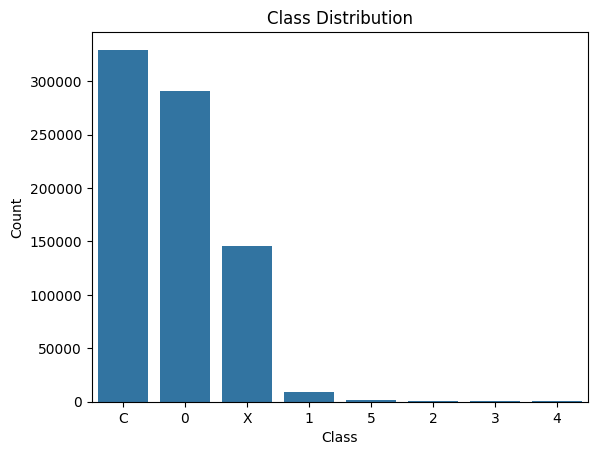

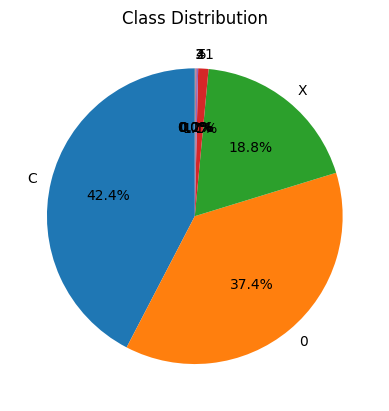

In [16]:
# Example: Analyzing target class distribution
class_counts = df['STATUS'].value_counts()

# Bar plot
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Pie chart
class_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Class Distribution")
plt.ylabel("")  # Remove y-label for better visualization
plt.show()

In [17]:
class_counts = df['STATUS'].value_counts()
class_percentages = (class_counts / len(df)) * 100

print("Class Counts:\n", class_counts)
print("\nClass Percentages:\n", class_percentages)

Class Counts:
 STATUS
C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: count, dtype: int64

Class Percentages:
 STATUS
C    27.931159
0    24.635557
X    12.370584
1     0.741387
5     0.129427
2     0.067892
3     0.024241
4     0.018138
Name: count, dtype: float64


In [18]:
# categorical qiymatlarni numerical qiymatga otkazib olamiz

categorical_col=df.select_dtypes(include=['object', 'category']).columns
label_encoder=LabelEncoder()
for col in categorical_col:
    df[col]=label_encoder.fit_transform(df[col])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179815 entries, 0 to 1179814
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ID                   1179815 non-null  int64  
 1   CODE_GENDER          1179815 non-null  int64  
 2   FLAG_OWN_CAR         1179815 non-null  int64  
 3   FLAG_OWN_REALTY      1179815 non-null  int64  
 4   CNT_CHILDREN         1179815 non-null  int64  
 5   AMT_INCOME_TOTAL     1179815 non-null  float64
 6   NAME_INCOME_TYPE     1179815 non-null  int64  
 7   NAME_EDUCATION_TYPE  1179815 non-null  int64  
 8   NAME_FAMILY_STATUS   1179815 non-null  int64  
 9   NAME_HOUSING_TYPE    1179815 non-null  int64  
 10  DAYS_BIRTH           1179815 non-null  float64
 11  DAYS_EMPLOYED        1179815 non-null  float64
 12  FLAG_MOBIL           1179815 non-null  float64
 13  FLAG_WORK_PHONE      1179815 non-null  float64
 14  FLAG_PHONE           1179815 non-null  int64  
 15

In [21]:
df[columns_to_convert] = df[columns_to_convert].fillna(0)

In [22]:
# Convert the specified columns to integer type
columns_to_convert = ['AMT_INCOME_TOTAL', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 
                      'FLAG_WORK_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 
                      'MONTHS_BALANCE']
# Applying astype to convert to int
df[columns_to_convert] = df[columns_to_convert].astype(int)

# Verify the changes
print(df[columns_to_convert].dtypes)

AMT_INCOME_TOTAL    int64
DAYS_EMPLOYED       int64
FLAG_MOBIL          int64
FLAG_WORK_PHONE     int64
FLAG_EMAIL          int64
CNT_FAM_MEMBERS     int64
MONTHS_BALANCE      int64
dtype: object


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179815 entries, 0 to 1179814
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ID                   1179815 non-null  int64  
 1   CODE_GENDER          1179815 non-null  int64  
 2   FLAG_OWN_CAR         1179815 non-null  int64  
 3   FLAG_OWN_REALTY      1179815 non-null  int64  
 4   CNT_CHILDREN         1179815 non-null  int64  
 5   AMT_INCOME_TOTAL     1179815 non-null  int64  
 6   NAME_INCOME_TYPE     1179815 non-null  int64  
 7   NAME_EDUCATION_TYPE  1179815 non-null  int64  
 8   NAME_FAMILY_STATUS   1179815 non-null  int64  
 9   NAME_HOUSING_TYPE    1179815 non-null  int64  
 10  DAYS_BIRTH           1179815 non-null  float64
 11  DAYS_EMPLOYED        1179815 non-null  int64  
 12  FLAG_MOBIL           1179815 non-null  int64  
 13  FLAG_WORK_PHONE      1179815 non-null  int64  
 14  FLAG_PHONE           1179815 non-null  int64  
 15

In [24]:
# Drop the specified columns
df = df.drop(columns=['DAYS_BIRTH', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'])

# Verify that the columns have been dropped
print(df.columns)


Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179815 entries, 0 to 1179814
Data columns (total 16 columns):
 #   Column               Non-Null Count    Dtype
---  ------               --------------    -----
 0   ID                   1179815 non-null  int64
 1   CODE_GENDER          1179815 non-null  int64
 2   FLAG_OWN_CAR         1179815 non-null  int64
 3   FLAG_OWN_REALTY      1179815 non-null  int64
 4   CNT_CHILDREN         1179815 non-null  int64
 5   AMT_INCOME_TOTAL     1179815 non-null  int64
 6   NAME_INCOME_TYPE     1179815 non-null  int64
 7   NAME_EDUCATION_TYPE  1179815 non-null  int64
 8   NAME_FAMILY_STATUS   1179815 non-null  int64
 9   NAME_HOUSING_TYPE    1179815 non-null  int64
 10  DAYS_EMPLOYED        1179815 non-null  int64
 11  FLAG_MOBIL           1179815 non-null  int64
 12  OCCUPATION_TYPE      1179815 non-null  int64
 13  CNT_FAM_MEMBERS      1179815 non-null  int64
 14  MONTHS_BALANCE       1179815 non-null  int64
 15  STATUS               1179815 non

In [26]:
import klib

df= klib.data_cleaning(df)

Shape of cleaned data: (1179815, 15) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 1
     of which 1 single valued.     Columns: ['flag_mobil']
Dropped missing values: 0
Reduced memory by at least: 117.02 MB (-81.25%)



In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179815 entries, 0 to 1179814
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype
---  ------               --------------    -----
 0   id                   1179815 non-null  int32
 1   code_gender          1179815 non-null  int8 
 2   flag_own_car         1179815 non-null  int8 
 3   flag_own_realty      1179815 non-null  int8 
 4   cnt_children         1179815 non-null  int8 
 5   amt_income_total     1179815 non-null  int32
 6   name_income_type     1179815 non-null  int8 
 7   name_education_type  1179815 non-null  int8 
 8   name_family_status   1179815 non-null  int8 
 9   name_housing_type    1179815 non-null  int8 
 10  days_employed        1179815 non-null  int32
 11  occupation_type      1179815 non-null  int8 
 12  cnt_fam_members      1179815 non-null  int8 
 13  months_balance       1179815 non-null  int8 
 14  status               1179815 non-null  int8 
dtypes: int32(3), int8(12)
memory usa

In [28]:
X = df.drop('status', axis=1)
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Step 7: Model Training
def train_model(X_train, y_train):
    rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    rf.fit(X_train, y_train)
    return rf

model = train_model(X_train, y_train)



Classification Report:


c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

              precision    recall  f1-score   support

           0       0.54      0.32      0.40     58436
           1       0.00      0.00      0.00      1765
           2       0.00      0.00      0.00       155
           3       0.00      0.00      0.00        54
           4       0.00      0.00      0.00        46
           5       0.00      0.00      0.00       312
           6       0.48      0.88      0.62     65416
           7       0.96      0.02      0.04     29281
           8       1.00      1.00      1.00     80498

    accuracy                           0.67    235963
   macro avg       0.33      0.25      0.23    235963
weighted avg       0.73      0.67      0.62    235963


Confusion Matrix:


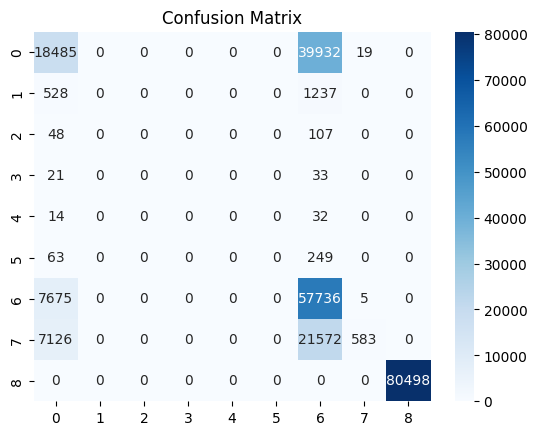


Accuracy: 0.6666


In [30]:
# Step 8: Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()
    print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")

evaluate_model(model, X_test, y_test)

# Feature Engineering

In [31]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)